# 대출 신청 승인 여부 데이터
- 과거 부동산 대출 신청자들의 데이터
- 소득, 대출 금액, 신용 기록 등에 따라 대출 승인 여부 결정
- 대출 승인 / 거부 여부 예측 모델 구축

## 데이터 구성

| 변수명                | 설명                                              | Non-null 값 수 | 데이터 타입 |
|-----------------------|---------------------------------------------------|----------------|-------------|
| **Loan_ID**            | 고유 대출 ID                                       | 614            | object      |
| **Gender**             | 성별 (남성/여성)                                    | 601            | object      |
| **Married**            | 결혼 여부 (Y/N) - 신청인이 결혼했는지 여부             | 611            | object      |
| **Dependents**         | 부양가족 수                                         | 599            | object      |
| **Education**          | 학력 (대학 졸업/비졸업)                             | 614            | object      |
| **Self_Employed**      | 자영업 여부 (Y/N) - 신청인이 자영업자인지 여부        | 582            | object      |
| **ApplicantIncome**    | 신청인 소득                                         | 614            | int64       |
| **CoapplicantIncome**  | 공동 신청인 소득                                    | 614            | float64     |
| **LoanAmount**         | 대출 금액 (천 단위)                                 | 592            | float64     |
| **Loan_Amount_Term**   | 대출 기간 (개월 단위)                                | 600            | float64     |
| **Credit_History**     | 신용 기록이 가이드라인에 부합하는지 여부             | 564            | float64     |
| **Property_Area**      | 부동산 위치 (도시/준도시/농촌)                      | 614            | object      |
| **Loan_Status**        | 대출 승인 여부 (Y/N)                                | 614            | object      |

## 데이터 파악

In [88]:
# import package

import numpy as np
import pandas as pd
import matplotlib 
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.preprocessing import LabelEncoder

matplotlib.rc('font', family = 'Malgun Gothic')
matplotlib.rc('axes', unicode_minus=False)
warnings.filterwarnings('ignore')

In [117]:
# load dataset
df = pd.read_csv('data/Loan Status Prediction.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [119]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [121]:
cols = df.columns[1:]
for col in cols:
    print(col, ": Value Counts")
    print(df[col].value_counts())
    print("========================\n")

Gender : Value Counts
Gender
Male      489
Female    112
Name: count, dtype: int64

Married : Value Counts
Married
Yes    398
No     213
Name: count, dtype: int64

Dependents : Value Counts
Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

Education : Value Counts
Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64

Self_Employed : Value Counts
Self_Employed
No     500
Yes     82
Name: count, dtype: int64

ApplicantIncome : Value Counts
ApplicantIncome
2500    9
4583    6
6000    6
2600    6
3333    5
       ..
3244    1
4408    1
3917    1
3992    1
7583    1
Name: count, Length: 505, dtype: int64

CoapplicantIncome : Value Counts
CoapplicantIncome
0.0       273
2500.0      5
2083.0      5
1666.0      5
2250.0      3
         ... 
2791.0      1
1010.0      1
1695.0      1
2598.0      1
240.0       1
Name: count, Length: 287, dtype: int64

LoanAmount : Value Counts
LoanAmount
120.0    20
110.0    17
100.0    15
160.0    12
187.0    12

## 데이터 전처리

### 결측치 처리

In [125]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

- Gender, Married, Dependents, Self_Employed, Loan_Amount_Term, Credit_History 는 최빈값 대체
- LoanAmount는 대출 승인 여부에 중요한 변수라고 판단하여 결측치 제거

In [128]:
# drop Loan Amount's Null Values
df = df.dropna(subset=['LoanAmount'])

# Replace missing values with the mode
df['Gender'] = df['Gender'].fillna(df['Gender'].mode().iloc[0])
df['Married'] = df['Married'].fillna(df['Married'].mode().iloc[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode().iloc[0])
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode().iloc[0])
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode().iloc[0])
df['Dependents'] = df['Dependents'].replace(['0', '1', '2', '3+'], [0,1,2,3])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode().iloc[0])

In [130]:
df.isnull().sum().sum()

0

### 데이터 형변환
- float type 변수에 소수점 값 없음 -> int로 type 변환

In [133]:
df['CoapplicantIncome'] = df['CoapplicantIncome'].astype(int)
df['LoanAmount'] = df['LoanAmount'].astype(int)
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].astype(int)
df['Credit_History'] = df['Credit_History'].astype(int)
df['Dependents'] = df['Dependents'].astype(int)

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 592 entries, 1 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Loan_ID            592 non-null    object
 1   Gender             592 non-null    object
 2   Married            592 non-null    object
 3   Dependents         592 non-null    int32 
 4   Education          592 non-null    object
 5   Self_Employed      592 non-null    object
 6   ApplicantIncome    592 non-null    int64 
 7   CoapplicantIncome  592 non-null    int32 
 8   LoanAmount         592 non-null    int32 
 9   Loan_Amount_Term   592 non-null    int32 
 10  Credit_History     592 non-null    int32 
 11  Property_Area      592 non-null    object
 12  Loan_Status        592 non-null    object
dtypes: int32(5), int64(1), object(7)
memory usage: 53.2+ KB


## 데이터 시각화

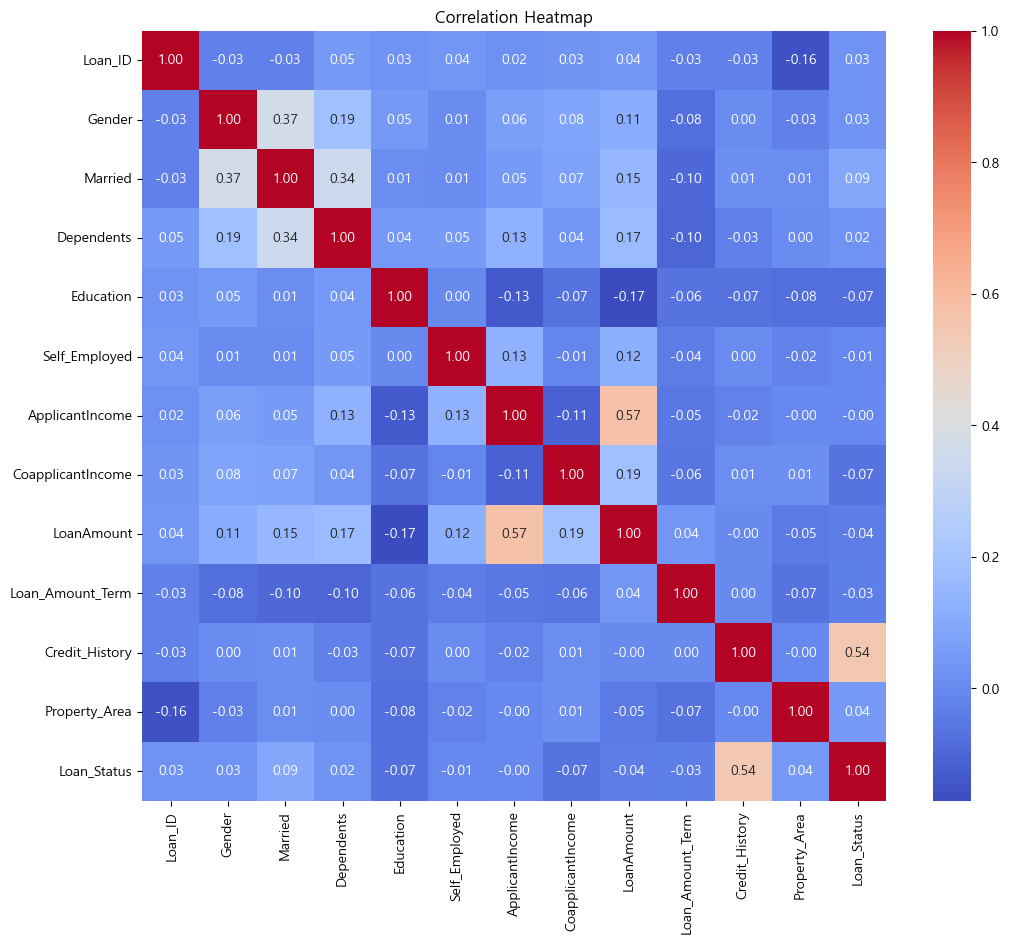

In [138]:
# LabelEncoding to object columns

df_temp = df.copy()

for column in df_temp.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df_temp[column] = le.fit_transform(df_temp[column].astype(str))

# draw heatmap
corr_matrix = df_temp.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

<Axes: xlabel='Credit_History', ylabel='count'>

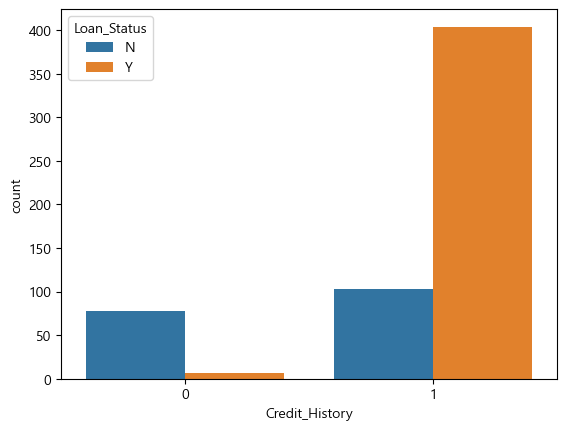

In [142]:
sns.countplot(data=df, x='Credit_History', hue='Loan_Status')

## 정제 데이터 셋 저장

In [ ]:
df = df.drop('Loan_ID', axis 